<a href="https://colab.research.google.com/github/JoseEpitacio/CRUD_cadastraNota/blob/main/1_Selecao_Feature_Sele%C3%A7%C3%A3o_Univariada_Muito_Importante_para_sele%C3%A7%C3%A3o_das_melhores_Features_para_Treinamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [5]:
data = pd.read_csv("train2.csv")

X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("train2.csv")
X = data.iloc[:,0:20]
y = data.iloc[:,-1]

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.06161128 0.01957838 0.03289258 0.01920044 0.03199419 0.0183495
 0.03453181 0.03291186 0.03564995 0.03239558 0.03199069 0.04807924
 0.04921882 0.40021942 0.03366465 0.03393407 0.03322338 0.01408506
 0.01660923 0.01985984]


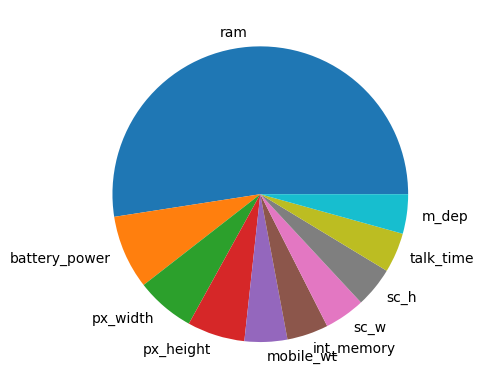

In [14]:
#Plotando o Resultado
feat_importances_ = pd.Series(model.feature_importances_, index=X.columns)
feat_importances_.nlargest(10).plot(kind='pie')
plt.show()

In [ ]:
#Trabalhando com a matriz de correlação

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('train2.csv')
X = data.iloc[:,0:20]
y = data.iloc[:,-1]

format = data.corr()
top_corr =